In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

# ============================
# ✅ DOWNLOAD COCO128 DATASET
# ============================
from torch.hub import download_url_to_file
import os

dataset_dir = '/kaggle/working/yolov5/datasets'
os.makedirs(dataset_dir, exist_ok=True)

# Download coco128.zip
dataset_zip_path = os.path.join(dataset_dir, 'coco128.zip')
download_url_to_file('https://ultralytics.com/assets/coco128.zip', dataset_zip_path)

# Unzip
!unzip -q {dataset_zip_path} -d {dataset_dir}
!rm {dataset_zip_path}

# ============================
# ✅ CREATE CUSTOM YAML CONFIG
# ============================
yaml_path = '/kaggle/working/yolov5/coco_custom.yaml'
yaml_content = """
train: /kaggle/working/yolov5/datasets/coco128/images/train2017
val: /kaggle/working/yolov5/datasets/coco128/images/train2017  # You can change this to val2017 if you want

nc: 80
names: [ 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
         'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
         'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
         'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
         'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
         'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
         'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
         'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
         'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
         'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
         'potted plant', 'bed', 'dining table', 'toilet', 'tv',
         'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
         'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
         'book', 'clock', 'vase', 'scissors', 'teddy bear',
         'hair drier', 'toothbrush' ]
"""

# Write YAML file
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ Custom YAML created at {yaml_path}")

# ============================
# ✅ TRAIN YOLOv5
# ============================
!python3 /kaggle/working/yolov5/train.py --img 640 --batch 16 --epochs 3 --data /kaggle/working/yolov5/coco_custom.yaml --weights yolov5s.pt --project /kaggle/working/yolov5/my_yolo --name my_run_final --exist-ok


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.59 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 22.7 MB/s eta 0:00:0

100%|██████████| 6.66M/6.66M [00:00<00:00, 91.8MB/s]


✅ Custom YAML created at /kaggle/working/yolov5/coco_custom.yaml
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-13 06:17:37.514912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749795457.712603     105 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749795457.773660     105 cuda_blas.cc:1418] Unable to register cu

In [4]:
!python3 /kaggle/working/yolov5/detect.py \
  --weights /kaggle/working/yolov5/my_yolo/my_run_final/weights/best.pt \
  --source /kaggle/working/yolov5/datasets/coco128/images/train2017 \
  --img 640 \
  --conf 0.25 \
  --save-txt \
  --save-conf \
  --project /kaggle/working/yolov5/my_yolo \
  --name detect_run \
  --exist-ok


detect: weights=['/kaggle/working/yolov5/my_yolo/my_run_final/weights/best.pt'], source=/kaggle/working/yolov5/datasets/coco128/images/train2017, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/kaggle/working/yolov5/my_yolo, name=detect_run, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/128 /kaggle/working/yolov5/datasets/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 4 oranges, 2 broccolis, 35.3ms
image 2/128 /kaggle/working/yolov5/datasets/coco128/images/train2017/000000000025.jpg: 448

In [3]:
!ls -R /kaggle/working/yolov5

/kaggle/working/yolov5:
benchmarks.py	  data	      LICENSE	      README.md		tutorial.ipynb
CITATION.cff	  datasets    models	      README.zh-CN.md	utils
classify	  detect.py   my_yolo	      requirements.txt	val.py
coco_custom.yaml  export.py   __pycache__     segment		yolov5s.pt
CONTRIBUTING.md   hubconf.py  pyproject.toml  train.py

/kaggle/working/yolov5/classify:
predict.py  train.py  tutorial.ipynb  val.py

/kaggle/working/yolov5/data:
Argoverse.yaml	      hyps		 images		  VOC.yaml
coco128-seg.yaml      ImageNet1000.yaml  Objects365.yaml  xView.yaml
coco128.yaml	      ImageNet100.yaml	 scripts
coco.yaml	      ImageNet10.yaml	 SKU-110K.yaml
GlobalWheat2020.yaml  ImageNet.yaml	 VisDrone.yaml

/kaggle/working/yolov5/data/hyps:
hyp.no-augmentation.yaml  hyp.scratch-high.yaml  hyp.scratch-med.yaml
hyp.Objects365.yaml	  hyp.scratch-low.yaml	 hyp.VOC.yaml

/kaggle/working/yolov5/data/images:
bus.jpg  zidane.jpg

/kaggle/working/yolov5/data/scripts:
download_weights.sh  get_coco.sh	  get_i

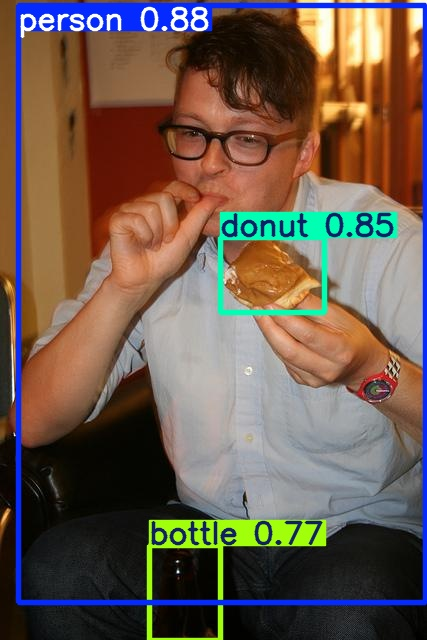

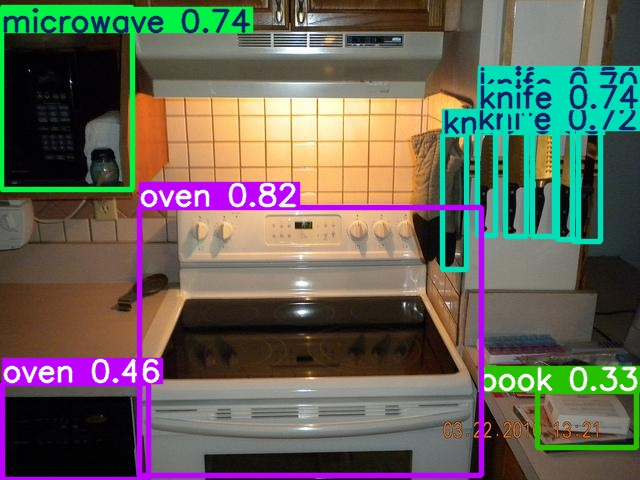

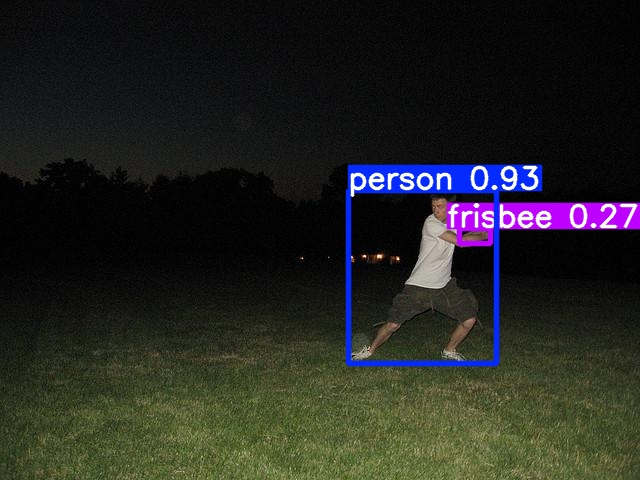

In [6]:
import glob
from IPython.display import Image, display

# Grab all detected result images
result_images = glob.glob('/kaggle/working/yolov5/my_yolo/detect_run/*.jpg')

# Show only first 3 images (or fewer if not enough results)
for img_path in result_images[:3]:
    display(Image(filename=img_path))


In [7]:
import shutil
shutil.make_archive('detect_results', 'zip', '/kaggle/working/yolov5/my_yolo/detect_run')


'/kaggle/working/yolov5/detect_results.zip'

In [8]:
from IPython.display import FileLink
FileLink('detect_results.zip')


/kaggle/working/yolov5/detect_results.zip

In [ ]:
#  If you want to integrate into Streamlit
# ➡ Move or copy this detect_run directory or the zipped file to a location your Streamlit app will access:

# Save images (.jpg)

# Save labels (.txt if you did --save-txt)

# Streamlit will load/display like I showed earlier.

